# Example EDA of toxicity annotation dataset

## Step 1: Download datasets

In [3]:
!wget https://ndownloader.figshare.com/files/7394539 -O toxicity_annotations.tsv 

--2020-10-19 03:44:18--  https://ndownloader.figshare.com/files/7394539
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.77.6.92, 52.30.81.7, 34.250.56.245, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.77.6.92|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394539/toxicity_annotations.tsv [following]
--2020-10-19 03:44:19--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394539/toxicity_annotations.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.84.218
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.84.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36177321 (35M) [binary/octet-stream]
Saving to: ‘toxicity_annotations.tsv’

toxicity_annotation 100%[===================>]  34.50M  13.8MB/s    in 2.5s    

2020-10-19 03:44:22 (13.8 MB/s) - ‘toxicity_annotations.t

In [4]:
!wget https://ndownloader.figshare.com/files/7394542 -O toxicity_annotated_comments.tsv

--2020-10-19 03:44:23--  https://ndownloader.figshare.com/files/7394542
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.77.6.92, 52.30.81.7, 34.250.56.245, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.77.6.92|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394542/toxicity_annotated_comments.tsv [following]
--2020-10-19 03:44:24--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394542/toxicity_annotated_comments.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.108.67
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.108.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78187921 (75M) [binary/octet-stream]
Saving to: ‘toxicity_annotated_comments.tsv’

toxicity_annotated_ 100%[===================>]  74.57M  17.0MB/s    in 4.4s    

2020-10-19 03:44:29 (17.0 MB/s) - ‘t

In [5]:
!wget https://ndownloader.figshare.com/files/7640581 -O toxicity_worker_demographics.tsv

--2020-10-19 03:44:30--  https://ndownloader.figshare.com/files/7640581
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.77.6.92, 52.30.81.7, 34.250.56.245, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.77.6.92|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640581/toxicity_worker_demographics.tsv [following]
--2020-10-19 03:44:31--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640581/toxicity_worker_demographics.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.106.27
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.106.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94645 (92K) [binary/octet-stream]
Saving to: ‘toxicity_worker_demographics.tsv’

toxicity_worker_dem 100%[===================>]  92.43K   222KB/s    in 0.4s    

2020-10-19 03:44:32 (222 KB/s) - ‘to

## Step 2: Load tables using pandas

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
toxicity_annotations = pd.read_csv("toxicity_annotations.tsv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("toxicity_annotated_comments.tsv", delimiter="\t")
toxicity_worker_demographics = pd.read_csv("toxicity_worker_demographics.tsv", delimiter="\t")

toxicity_worker_demographics = toxicity_worker_demographics.set_index("worker_id")

Briefly inspect each table.

In [3]:
toxicity_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [4]:
toxicity_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test


In [5]:
toxicity_worker_demographics.head()

,gender,english_first_language,age_group,education
worker_id,,,,
85,female,0,18-30,bachelors
1617,female,0,45-60,bachelors
1394,female,0,NaN,bachelors
311,male,0,30-45,bachelors
1980,male,0,45-60,masters


## Step 3: Join annotation table to demographics table

In [6]:
joined_annotations = pd.merge(toxicity_annotations, toxicity_worker_demographics, left_on="worker_id", right_index=True)

In [7]:
joined_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0,30-45,bachelors
71,37346.0,723,0,0.0,female,0,30-45,bachelors
417,227181.0,723,0,0.0,female,0,30-45,bachelors
4281,2810755.0,723,0,0.0,female,0,30-45,bachelors
10305,7270696.0,723,0,0.0,female,0,30-45,bachelors


## Basic EDA

At this point you start asking question.

I can calculate the average score per worker - that worker's "toxicity bias". Is this different for different age groups?

In [8]:
mean_toxicity_score = joined_annotations.groupby("worker_id")["toxicity_score"].mean()
toxicity_worker_demographics["mean_toxicity_score"] = mean_toxicity_score

Take a quick look at our newly augmented table.

In [9]:
toxicity_worker_demographics.head()

,gender,english_first_language,age_group,education,mean_toxicity_score
worker_id,,,,,
85,female,0,18-30,bachelors,-0.131417
1617,female,0,45-60,bachelors,-0.080831
1394,female,0,NaN,bachelors,-0.185882
311,male,0,30-45,bachelors,-0.082789
1980,male,0,45-60,masters,0.582938


Now let's compute an average toxicity statistic for each group...

In [10]:
toxicity_worker_demographics.groupby("age_group").mean_toxicity_score.mean()

age_group
18-30       0.192189
30-45       0.236698
45-60       0.228319
Over 60     0.157787
Under 18    0.282304
Name: mean_toxicity_score, dtype: float64

The "toxicity bias" does vary by group!

We can even plot the distribution of personal biases in each group:

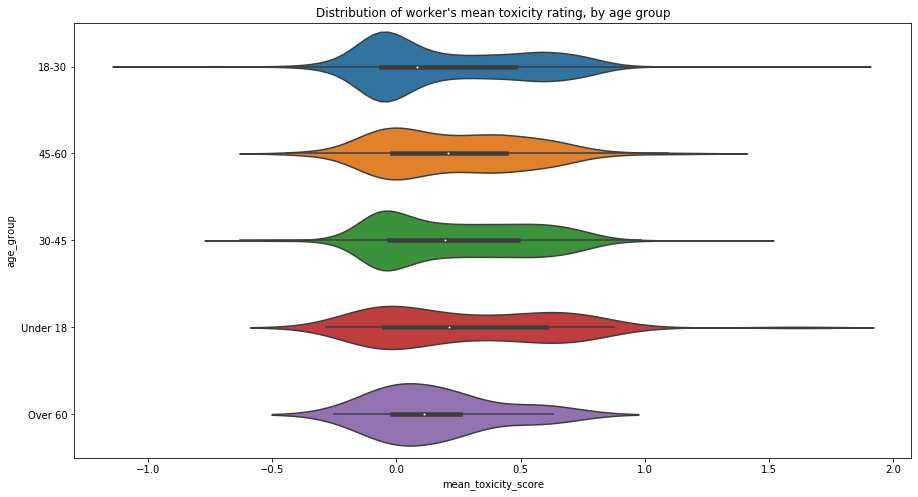

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of worker's mean toxicity rating, by age group")
sns.violinplot( x="mean_toxicity_score", y="age_group", data=toxicity_worker_demographics, ax=ax )

## A very basic bias question: is the set of annotation workers gender-balanced?

In [12]:
foo = toxicity_worker_demographics.groupby("gender").age_group.count()
foo/foo.sum()

gender
female    0.351167
male      0.648549
other     0.000285
Name: age_group, dtype: float64

The answer is **no** - 64.8% of annotators are male.

## Is the set of _annotations_ gender-balanced?

In [13]:
foo = joined_annotations.groupby("gender").rev_id.count()
foo/foo.sum()

gender
female    0.339541
male      0.660194
other     0.000266
Name: rev_id, dtype: float64

Also no, about the same fraction - 66.0% of annotations - were made by male annotators.